## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt

自作ライブラリのインポート

In [2]:
from main import MiddleLayer, OutputLayer, sigmoid, sigmoid_dash, identity, error_dash

## データの作成

In [3]:
sin_data = np.arange(0, 2 * np.pi, 0.1).reshape((-1, 1))

X = (sin_data - np.pi) / np.pi
Y = np.sin(sin_data)

描画用関数

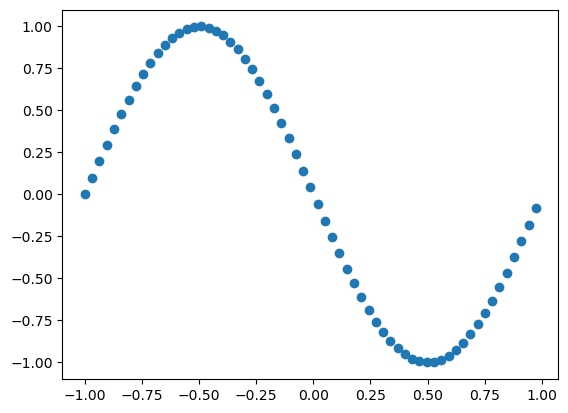

In [4]:
def plot(Y_dash=None):
    plt.scatter(X, Y)
    if Y_dash is not None:
        plt.scatter(X, Y_dash)
    plt.show()

plot()

## デモ

layer を作成

In [5]:
Layers = []

Layers.append(MiddleLayer(1, 3, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(3, 1, activation_func=identity, error_func_dash=error_dash))

重みとバイアスの確認

In [6]:
Layers[0].W, Layers[0].b

(array([[-1.04063585e-02,  3.04592997e-05, -7.41386181e-04]]),
 array([-0.01105015,  0.01585995,  0.00697744]))

順伝播(=無学習の状態で予測)

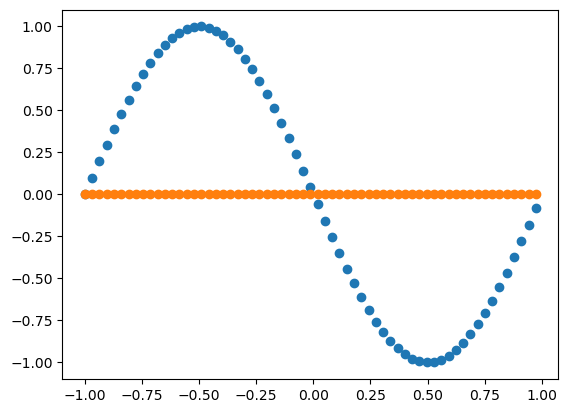

In [7]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

逆伝播(=初めての学習)

In [8]:
dY1 = Layers[1].backward(Y)
_ = Layers[0].backward(dY1)

順伝播(2回目)

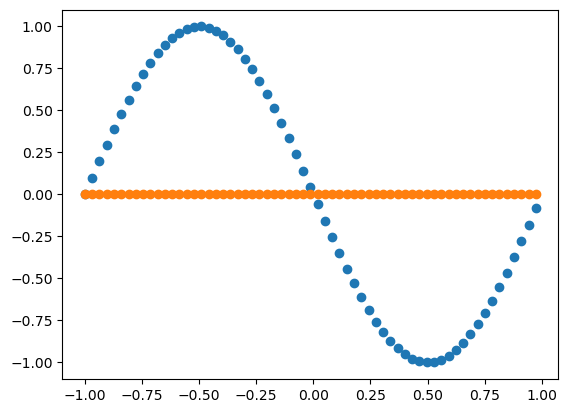

In [9]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

重みとバイアスが更新されたことを確認

In [10]:
Layers[0].W, Layers[0].b

(array([[-0.01013386,  0.00078827,  0.00518673]]),
 array([-0.01105026,  0.01585967,  0.00697526]))

## 学習

layer の作成

In [11]:
Layers = []

Layers.append(MiddleLayer(1, 3, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(3, 1, activation_func=identity, error_func_dash=error_dash))

設定

In [12]:
epoch = 2001
batch = 10
n_data = len(X)
interval = 200

エポックごとに学習

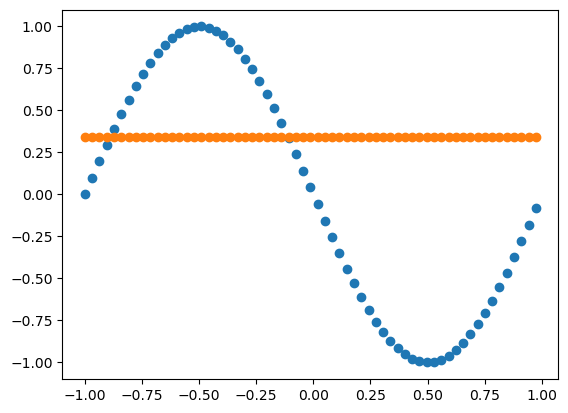

Epoch: 0/2001 Error: 0.30874440614124193


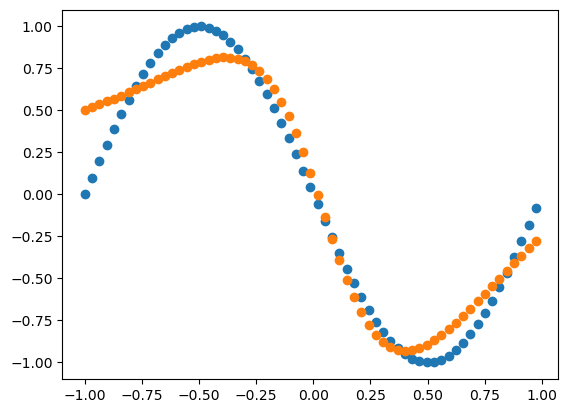

Epoch: 200/2001 Error: 0.011630166599961848


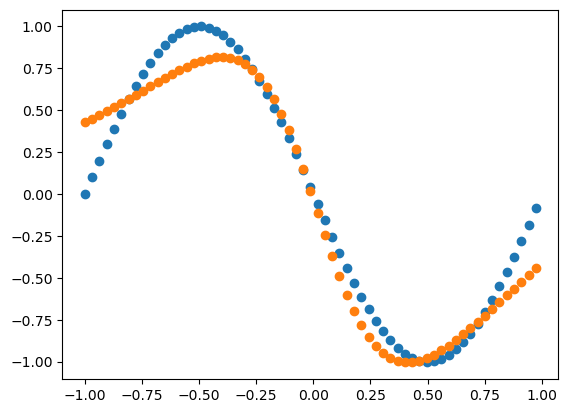

Epoch: 400/2001 Error: 0.011590961978905974


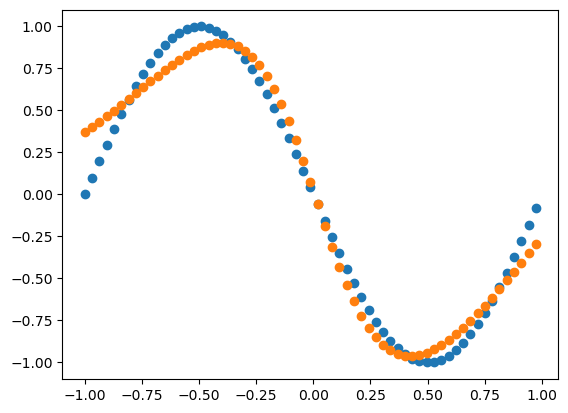

Epoch: 600/2001 Error: 0.006484927247651771


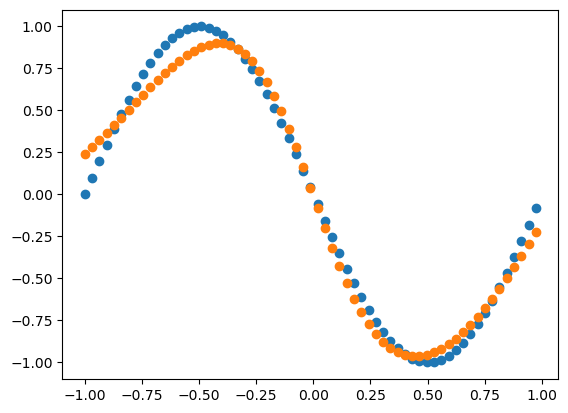

Epoch: 800/2001 Error: 0.004049747753258226


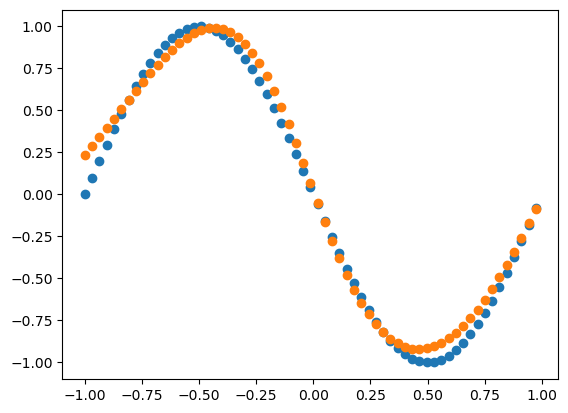

Epoch: 1000/2001 Error: 0.0027533544884004286


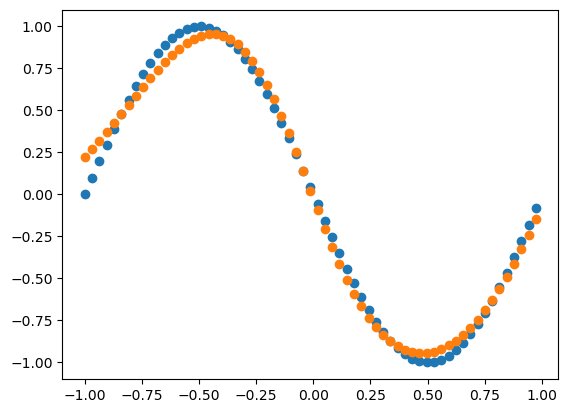

Epoch: 1200/2001 Error: 0.00204665821923056


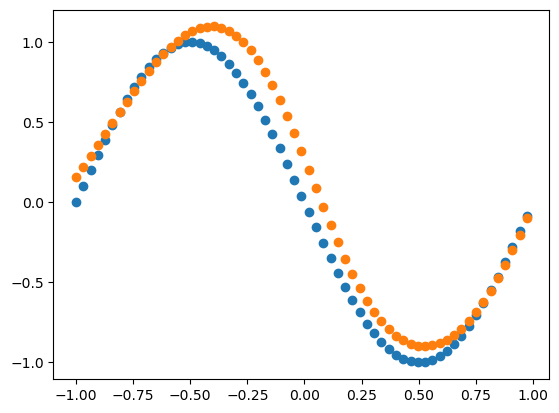

Epoch: 1400/2001 Error: 0.011696562125365916


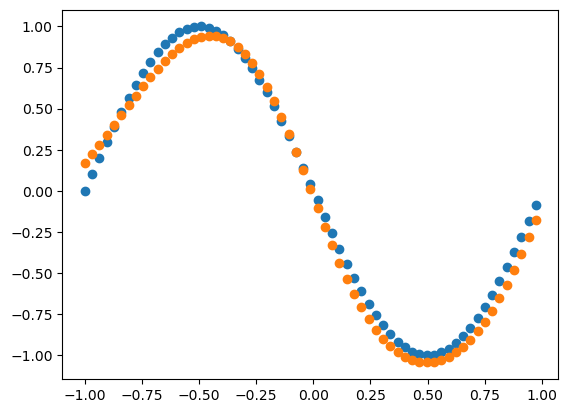

Epoch: 1600/2001 Error: 0.0026737604233849958


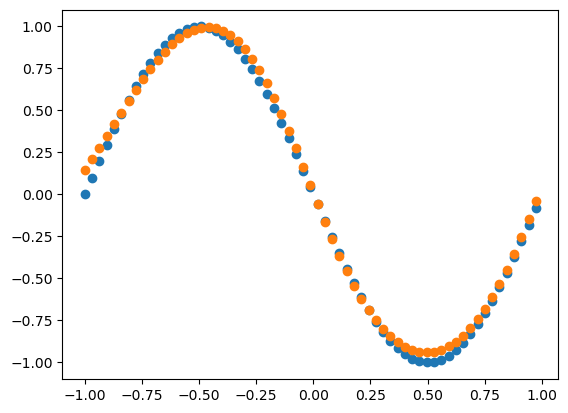

Epoch: 1800/2001 Error: 0.00095730372338995


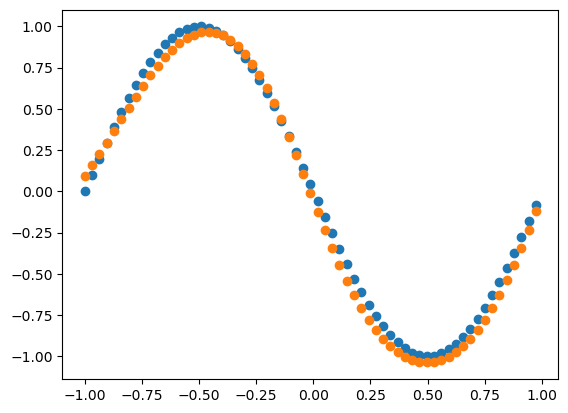

Epoch: 2000/2001 Error: 0.0017702515964514757


In [13]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    for j in range(0, n_data, batch):
        idx = index_random[j: j + batch]

        tX, tY = X[idx], Y[idx]

        for layer in Layers:
            tX = layer.forward(tX)

        for layer in Layers[::-1]:
            tY = layer.backward(tY)
    
    if i % interval == 0:
        Y_dash = X[::]

        for layer in Layers:
            Y_dash = layer.forward(Y_dash)

        total_error = np.sum(np.square(Y_dash - Y)) / 2

        plot(Y_dash)
        print(f"Epoch: {i}/{epoch}", f"Error: {total_error / n_data}")

## 本

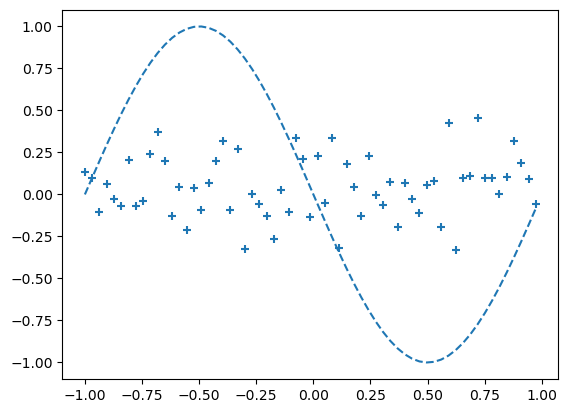

Epoch:0/2001 Error:0.2706905657745339


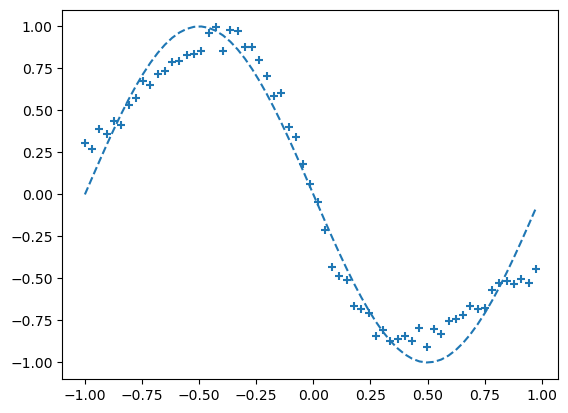

Epoch:200/2001 Error:0.00943404884187601


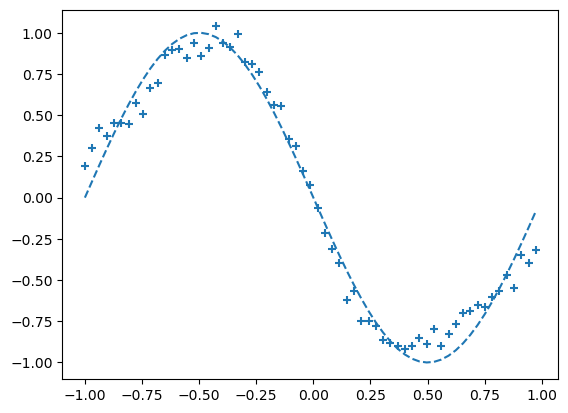

Epoch:400/2001 Error:0.005973271478530958


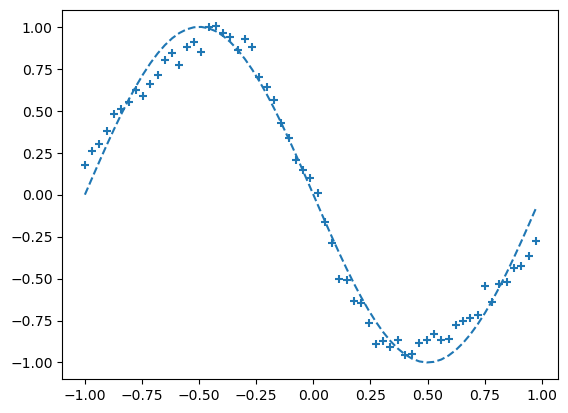

Epoch:600/2001 Error:0.0047961613503939675


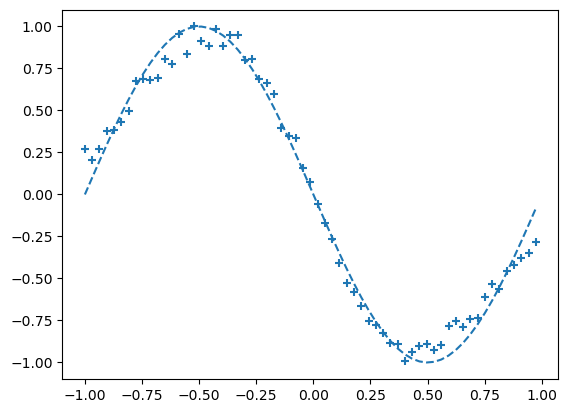

Epoch:800/2001 Error:0.003857088617959126


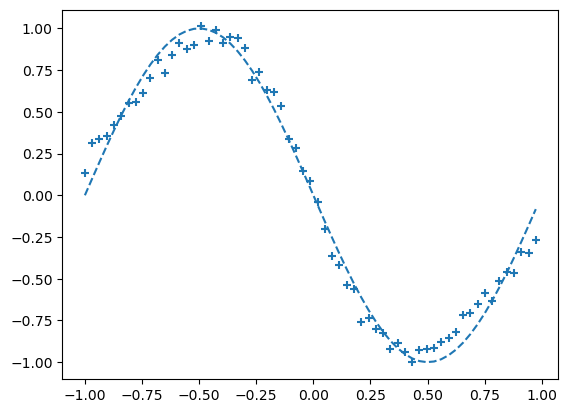

Epoch:1000/2001 Error:0.0038132549004272825


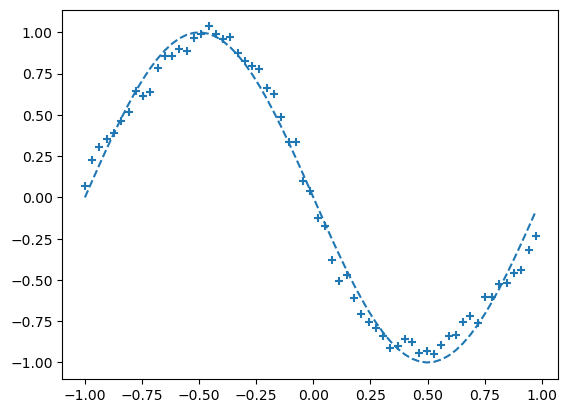

Epoch:1200/2001 Error:0.003130271862600551


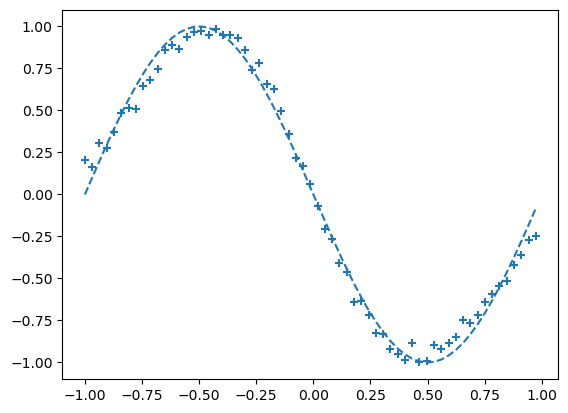

Epoch:1400/2001 Error:0.0024266374050714197


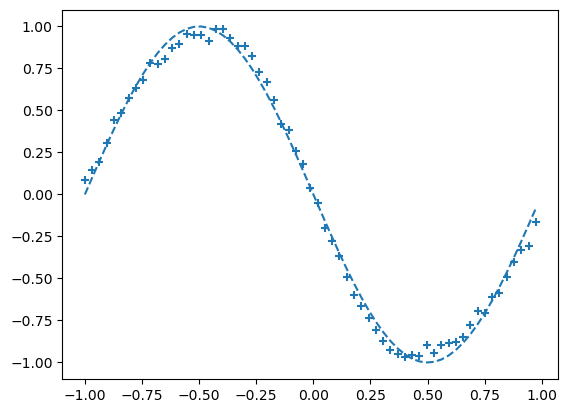

Epoch:1600/2001 Error:0.0013285841526798927


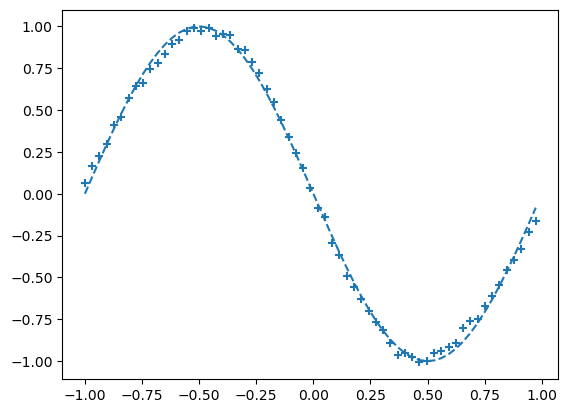

Epoch:1800/2001 Error:0.0006197146598552984


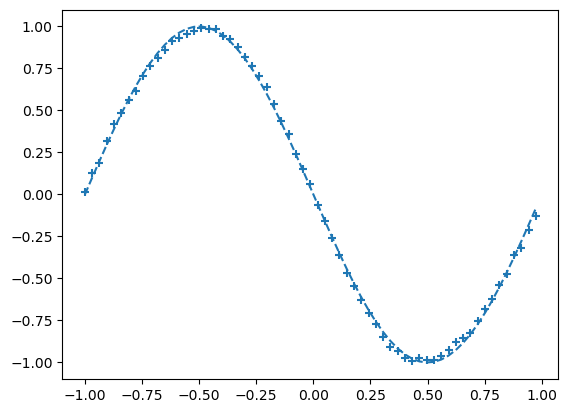

Epoch:2000/2001 Error:0.00024407874327968566


In [14]:
input_data = np.arange(0, np.pi * 2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi

n_data = len(correct_data)

epoch = 2001
interval = 200

Layers = []

Layers.append(MiddleLayer(1, 3, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(3, 1, activation_func=identity, error_func_dash=error_dash))

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    total_error = 0
    plot_x = []
    plot_y = []

    for idx in index_random:

        x = input_data[idx: idx + 1]
        t = correct_data[idx: idx + 1]

        X = x.reshape(1, 1)

        for layer in Layers:
            X = layer.forward(X)
        
        T = t.reshape(1, 1)

        for layer in Layers[::-1]:
            T = layer.backward(T)

        if i % interval == 0:
            y = Layers[-1].Y.reshape(-1)
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))

            plot_x.append(x)
            plot_y.append(y)
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))